# Load The Results with Standard Deviation and Plot Nicely

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob

matplotlib.rcParams.update({'font.size': 15})

### Load All of The Files

In [2]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_07.p',
 '2019-05-12_results-with-std.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '2019-05-11_results-with-std.p',
 '19-02-01_results_over_baseline_faces_03.p',
 '19-01-31_results.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_face_05.p']

## Pick the Dataset and Load Required Data

In [3]:
os.chdir('../results/')

In [4]:
(summary, context, model, metric) = pickle.load(open( "2019-05-11_results-with-std.p", "rb")) 
(summary2, context2, model2, metric2) = pickle.load(open( "2019-05-12_results-with-std.p", "rb")) 

In [5]:
print(np.shape(summary))
print(context)
print(model)
print(metric)

(6, 5, 8)
['all', 'person', 'no person', 'animal', 'sports', 'electronic']
['gbvs', 'gbvs_face_03', 'gbvs_face_05', 'gbvs_face_07', 'dg']
['nss mean', 'sim mean', 'ig mean', 'auc mean', 'nss std', 'sim std', 'ig std', 'auc std']


### First File

In [6]:
nss_mean = summary[:,:,0]
sim_mean = summary[:,:,1]

nss_std = summary[:,:,4]
sim_std = summary[:,:,5]

### Second File

In [7]:
ig_mean = summary2[:,:,2]
auc_mean = summary2[:,:,3]

ig_std = summary2[:,:,6]
auc_std = summary2[:,:,7]

## Create DataFrames

In [8]:
df_nss_mean = pd.DataFrame(data=nss_mean, columns=model, index=context)
df_nss_std = pd.DataFrame(data=nss_std, columns=model, index=context)

In [9]:
df_sim_mean = pd.DataFrame(data=sim_mean, columns=model, index=context)
df_sim_std = pd.DataFrame(data=sim_std, columns=model, index=context)

In [10]:
df_ig_mean = pd.DataFrame(data=ig_mean, columns=model2, index=context2)
df_ig_std = pd.DataFrame(data=ig_std, columns=model2, index=context2)

In [11]:
df_auc_mean = pd.DataFrame(data=auc_mean, columns=model2, index=context2)
df_auc_std = pd.DataFrame(data=auc_std, columns=model2, index=context2)

In [12]:
df_ig_mean

,gbvs,gbvs_face_03,gbvs_face_05,gbvs_face_07,dg
all,4.389129,4.401902,4.409638,4.407047,3.110164
person,4.261897,4.283458,4.295767,4.291430,2.745240
no person,4.595379,4.593905,4.594228,4.594469,3.701723
animal,4.601708,4.607203,4.612659,4.618031,2.988734
sports,4.191043,4.194267,4.198131,4.180200,1.685864
electronic,4.949470,4.971440,4.982618,4.974742,3.812890


In [13]:
df_ig_std

,gbvs,gbvs_face_03,gbvs_face_05,gbvs_face_07,dg
all,2.754745,2.757972,2.756112,2.750730,3.645712
person,2.806243,2.810237,2.807265,2.798518,3.934831
no person,2.656238,2.659893,2.660777,2.660797,3.028623
animal,2.659255,2.658761,2.658060,2.656514,3.833621
sports,2.997117,3.006711,3.012042,3.017558,4.809530
electronic,2.573112,2.578815,2.579128,2.573450,3.160790


# Plot By Metric

### Split to Necessary Arrays for Easy Plotting

In [14]:
def split_arrays_for_plot(df):
    dg = df['dg']
    gbvs = df['gbvs']
    gbvs_f03 = df['gbvs_face_03']
    gbvs_f05 = df['gbvs_face_05']
    gbvs_f07 = df['gbvs_face_07']
    
    return dg, gbvs, gbvs_f03, gbvs_f05, gbvs_f07

In [15]:
auc_dg_m, auc_gbvs_m, auc_gbvs_f03_m, auc_gbvs_f05_m, auc_gbvs_f07_m = split_arrays_for_plot(df_auc_mean)
auc_dg_s, auc_gbvs_s, auc_gbvs_f03_s, auc_gbvs_f05_s, auc_gbvs_f07_s = split_arrays_for_plot(df_auc_std)

nss_dg_m, nss_gbvs_m, nss_gbvs_f03_m, nss_gbvs_f05_m, nss_gbvs_f07_m = split_arrays_for_plot(df_nss_mean)
nss_dg_s, nss_gbvs_s, nss_gbvs_f03_s, nss_gbvs_f05_s, nss_gbvs_f07_s = split_arrays_for_plot(df_nss_std)

sim_dg_m, sim_gbvs_m, sim_gbvs_f03_m, sim_gbvs_f05_m, sim_gbvs_f07_m = split_arrays_for_plot(df_sim_mean)
sim_dg_s, sim_gbvs_s, sim_gbvs_f03_s, sim_gbvs_f05_s, sim_gbvs_f07_s = split_arrays_for_plot(df_sim_std)

ig_dg_m, ig_gbvs_m, ig_gbvs_f03_m, ig_gbvs_f05_m, ig_gbvs_f07_m = split_arrays_for_plot(df_ig_mean)
ig_dg_s, ig_gbvs_s, ig_gbvs_f03_s, ig_gbvs_f05_s, ig_gbvs_f07_s = split_arrays_for_plot(df_ig_std)

### Plot Each of The Metrics

In [16]:
t = np.arange(0,6)
d = 0.8
m = 8

In [17]:
matplotlib.rcParams.update({'font.size': 16})

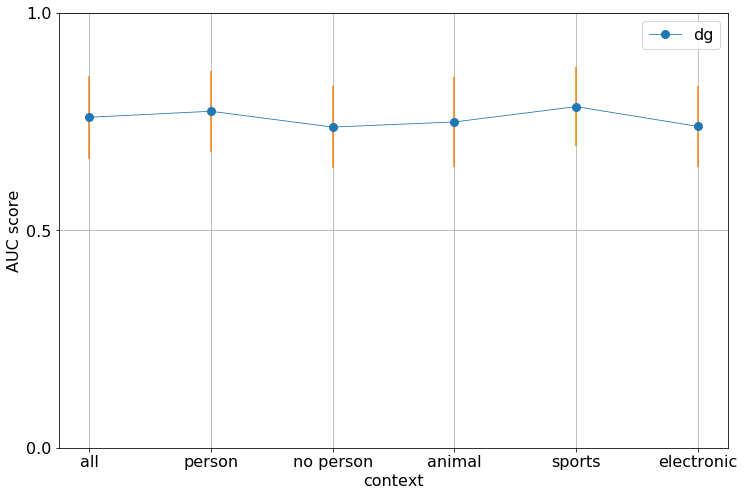

In [21]:
plt.subplots(figsize=(12,8))
plt.plot(auc_dg_m, '-o', label='dg', linewidth=d, markersize=m);
plt.errorbar(t, auc_dg_m, auc_dg_s, linestyle='None', label=None)

plt.grid()
plt.yticks(np.arange(0, 1.1, step=0.5))
plt.ylabel('AUC score')
plt.xlabel('context')
plt.legend();

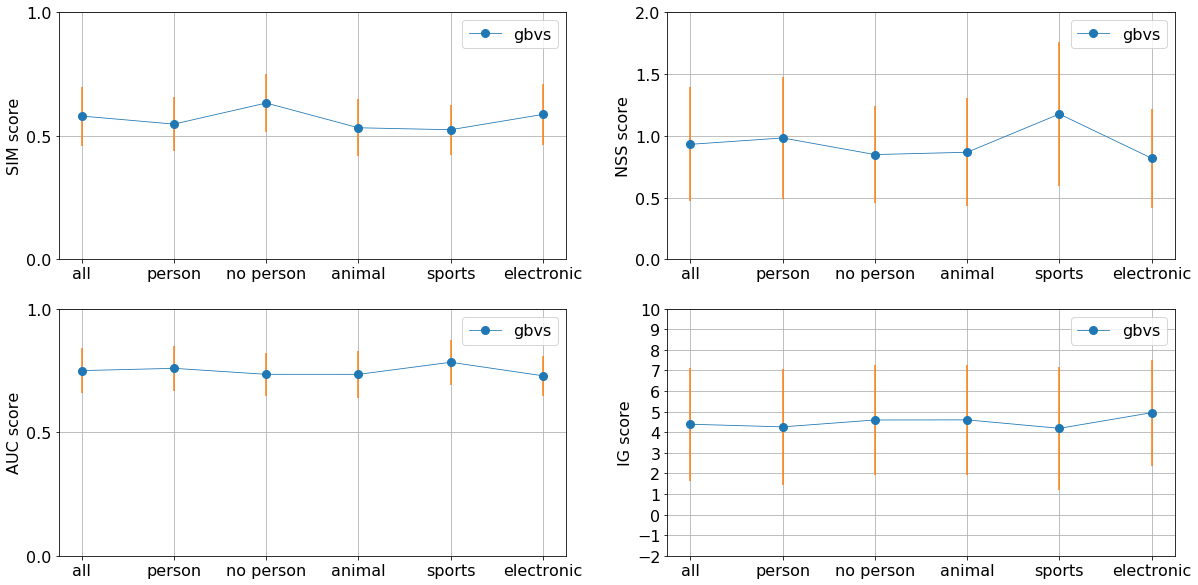

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax[0][0].plot(sim_gbvs_m, '-o', label='gbvs', linewidth=d, markersize=m);
ax[0][0].errorbar(t, sim_gbvs_m, sim_gbvs_s, linestyle='None', label=None)

ax[0][1].plot(nss_gbvs_m, '-o', label='gbvs', linewidth=d, markersize=m);
ax[0][1].errorbar(t, nss_gbvs_m, nss_gbvs_s, linestyle='None', label=None)

ax[1][0].plot(auc_gbvs_m, '-o', label='gbvs', linewidth=d, markersize=m);
ax[1][0].errorbar(t, auc_gbvs_m, auc_gbvs_s, linestyle='None', label=None)

ax[1][1].plot(ig_gbvs_m, '-o', label='gbvs', linewidth=d, markersize=m);
ax[1][1].errorbar(t, ig_gbvs_m, ig_gbvs_s, linestyle='None', label=None)

ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()
ax[0][0].set_yticks(np.arange(0, 1.1, step=0.5))
ax[0][1].set_yticks(np.arange(0, 2.1, step=0.5))
ax[1][0].set_yticks(np.arange(0, 1.1, step=0.5))
ax[1][1].set_yticks(np.arange(-2, 10.1, step=1))
ax[0][0].set_ylabel('SIM score')
ax[0][1].set_ylabel('NSS score')
ax[1][0].set_ylabel('AUC score')
ax[1][1].set_ylabel('IG score')
ax[0][0].legend();
ax[0][1].legend();
ax[1][0].legend();
ax[1][1].legend();

# Samples of Different Possible Styles

### NSS

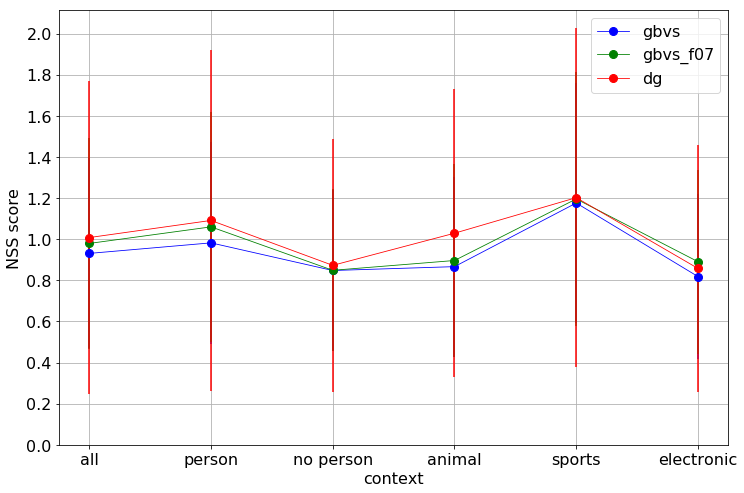

In [22]:
plt.subplots(figsize=(12,8))

plt.plot(nss_gbvs_m, '-o', label='gbvs', linewidth=d, markersize=m, c='b');
plt.errorbar(t, nss_gbvs_m, nss_gbvs_s, linestyle='None', c='b', label=None)

plt.plot(nss_gbvs_f07_m, '-o', label='gbvs_f07', linewidth=d, markersize=m, c='g');
plt.errorbar(t, nss_gbvs_f07_m, nss_gbvs_f07_s, linestyle='None', c='g', label=None)

plt.plot(nss_dg_m, '-o', label='dg', linewidth=d, markersize=m, c='r');
plt.errorbar(t, nss_dg_m, nss_dg_s, linestyle='None', c='r', label=None)

plt.grid()
plt.yticks(np.arange(0, 2.1, step=0.2))
plt.ylabel('NSS score')
plt.xlabel('context')
plt.legend();

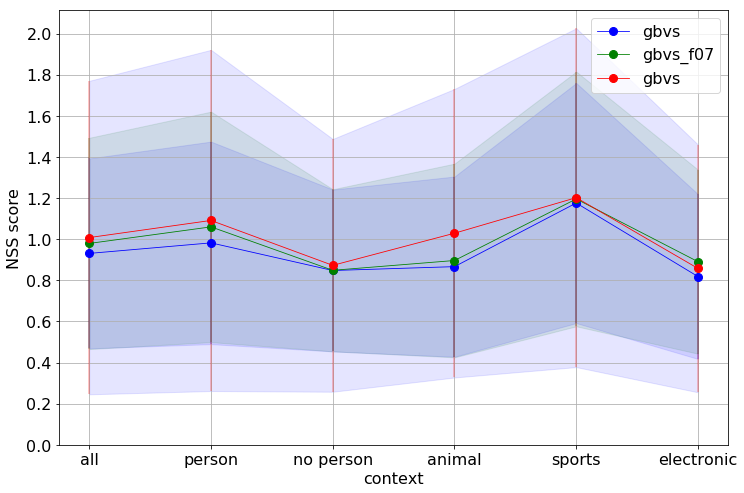

In [23]:
plt.subplots(figsize=(12,8))

plt.plot(nss_gbvs_m, '-o', label='gbvs', linewidth=d, markersize=m, c='b');
plt.errorbar(t, nss_gbvs_m, nss_gbvs_s, linestyle='None', c='b', label=None, alpha=0.3)
plt.fill_between(t, nss_gbvs_m - nss_gbvs_s, nss_gbvs_m + nss_gbvs_s, color='b', alpha=0.1)

plt.plot(nss_gbvs_f07_m, '-o', label='gbvs_f07', linewidth=d, markersize=m, c='g');
plt.errorbar(t, nss_gbvs_f07_m, nss_gbvs_f07_s, linestyle='None', c='g', label=None, alpha=0.3)
plt.fill_between(t, nss_gbvs_f07_m - nss_gbvs_f07_s, nss_gbvs_f07_m + nss_gbvs_f07_s, color='g', alpha=0.1)

plt.plot(nss_dg_m, '-o', label='gbvs', linewidth=d, markersize=m, c='r');
plt.errorbar(t, nss_dg_m, nss_dg_s, linestyle='None', c='r', label=None, alpha=0.3)
plt.fill_between(t, nss_dg_m - nss_dg_s, nss_dg_m + nss_dg_s, color='b', alpha=0.1)

plt.grid()
plt.yticks(np.arange(0, 2.1, step=0.2))
plt.ylabel('NSS score')
plt.xlabel('context')
plt.legend();

### AUC

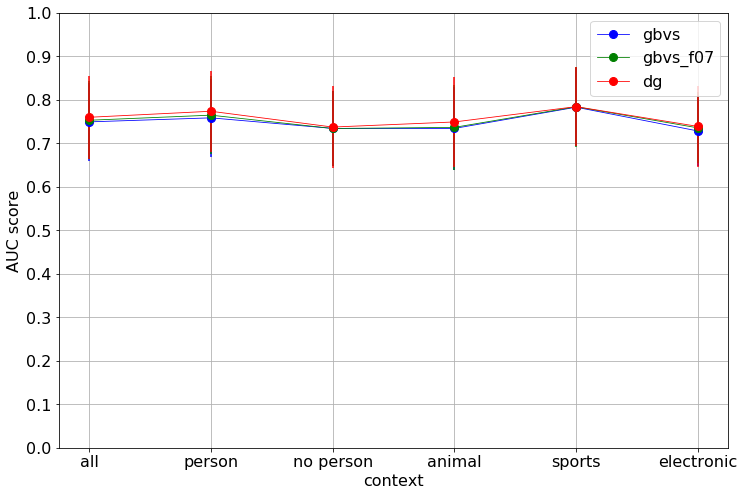

In [25]:
plt.subplots(figsize=(12,8))

plt.plot(auc_gbvs_m, '-o', label='gbvs', linewidth=d, markersize=m, c='b');
plt.errorbar(t, auc_gbvs_m, auc_gbvs_s, linestyle='None', c='b', label=None)

plt.plot(auc_gbvs_f07_m, '-o', label='gbvs_f07', linewidth=d, markersize=m, c='g');
plt.errorbar(t, auc_gbvs_f07_m, auc_gbvs_f07_s, linestyle='None', c='g', label=None)

plt.plot(auc_dg_m, '-o', label='dg', linewidth=d, markersize=m, c='r');
plt.errorbar(t, auc_dg_m, auc_dg_s, linestyle='None', c='r', label=None)

plt.grid()
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.ylabel('AUC score')
plt.xlabel('context')
plt.legend();

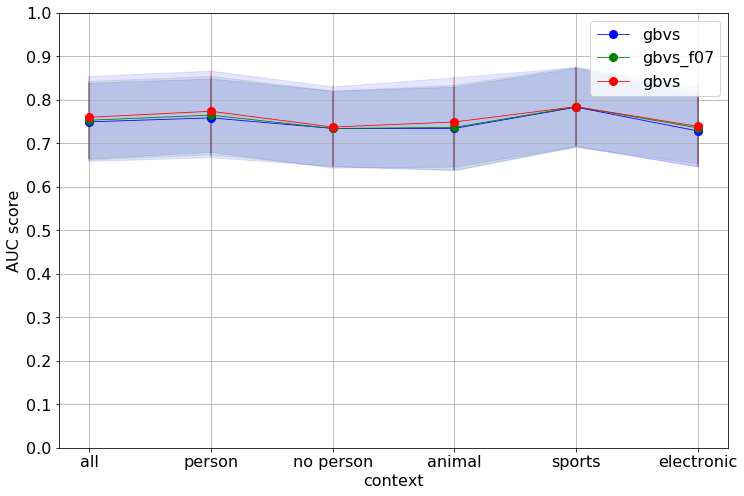

In [26]:
plt.subplots(figsize=(12,8))

plt.plot(auc_gbvs_m, '-o', label='gbvs', linewidth=d, markersize=m, c='b');
plt.errorbar(t, auc_gbvs_m, auc_gbvs_s, linestyle='None', c='b', label=None, alpha=0.3)
plt.fill_between(t, auc_gbvs_m - auc_gbvs_s, auc_gbvs_m + auc_gbvs_s, color='b', alpha=0.1)

plt.plot(auc_gbvs_f07_m, '-o', label='gbvs_f07', linewidth=d, markersize=m, c='g');
plt.errorbar(t, auc_gbvs_f07_m, auc_gbvs_f07_s, linestyle='None', c='g', label=None, alpha=0.3)
plt.fill_between(t, auc_gbvs_f07_m - auc_gbvs_f07_s, auc_gbvs_f07_m + auc_gbvs_f07_s, color='g', alpha=0.1)

plt.plot(auc_dg_m, '-o', label='gbvs', linewidth=d, markersize=m, c='r');
plt.errorbar(t, auc_dg_m, auc_dg_s, linestyle='None', c='r', label=None, alpha=0.3)
plt.fill_between(t, auc_dg_m - auc_dg_s, auc_dg_m + auc_dg_s, color='b', alpha=0.1)

plt.grid()
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.ylabel('AUC score')
plt.xlabel('context')
plt.legend();